In [ ]:
# Read the csv file for the credit_data
import os
from google.colab import drive
import matplotlib.pyplot as plt
from scipy.io import arff
drive.mount('/content/drive')

datapath = '/content/drive/My Drive/Colab Notebooks/'
os.path.exists(datapath)

credit_data = pd.read_csv(datapath + "csv_result-dataset_31_credit-g.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Checking the different variables in the credit_data columns
c = credit_data.columns
c

Index(['id', ''checking_status'', ''duration'', ''credit_history'',
       ''purpose'', ''credit_amount'', ''savings_status'', ''employment'',
       ''installment_commitment'', ''personal_status'', ''other_parties'',
       ''residence_since'', ''property_magnitude'', ''age'',
       ''other_payment_plans'', ''housing'', ''existing_credits'', ''job'',
       ''num_dependents'', ''own_telephone'', ''foreign_worker'', ''class''],
      dtype='object')

In [ ]:
# Using a for loop to go through the credit_data to get a better understanding of whether the variables are continuous or categorical
for i in c:
    print(i)
    print(credit_data[i].value_counts(dropna=False))
    print("\n")

id
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: id, Length: 1000, dtype: int64


'checking_status'
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: 'checking_status', dtype: int64


'duration'
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: 'duration', dtype: int64


'credit_history'
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: 'credit_history', dtype: int64


'purpose'
radio/tv               280
new car                234
furniture/equipment    181
use

In [ ]:
# Determining which features are continuous and which ones are categorical

# Continuous variables include
continuous = ["'duration'", "'credit_amount'", "'age'"]

# Categorical variables include
categorical = ["'checking_status'", "'credit_history'", "'purpose'", "'savings_status'", 
               "'employment'", "'installment_commitment'", "'personal_status'", "'other_parties'", 
               "'residence_since'", "'property_magnitude'", "'other_payment_plans'", 
               "'housing'", "'existing_credits'", "'job'", "'num_dependents'", "'own_telephone'", "'foreign_worker'"]

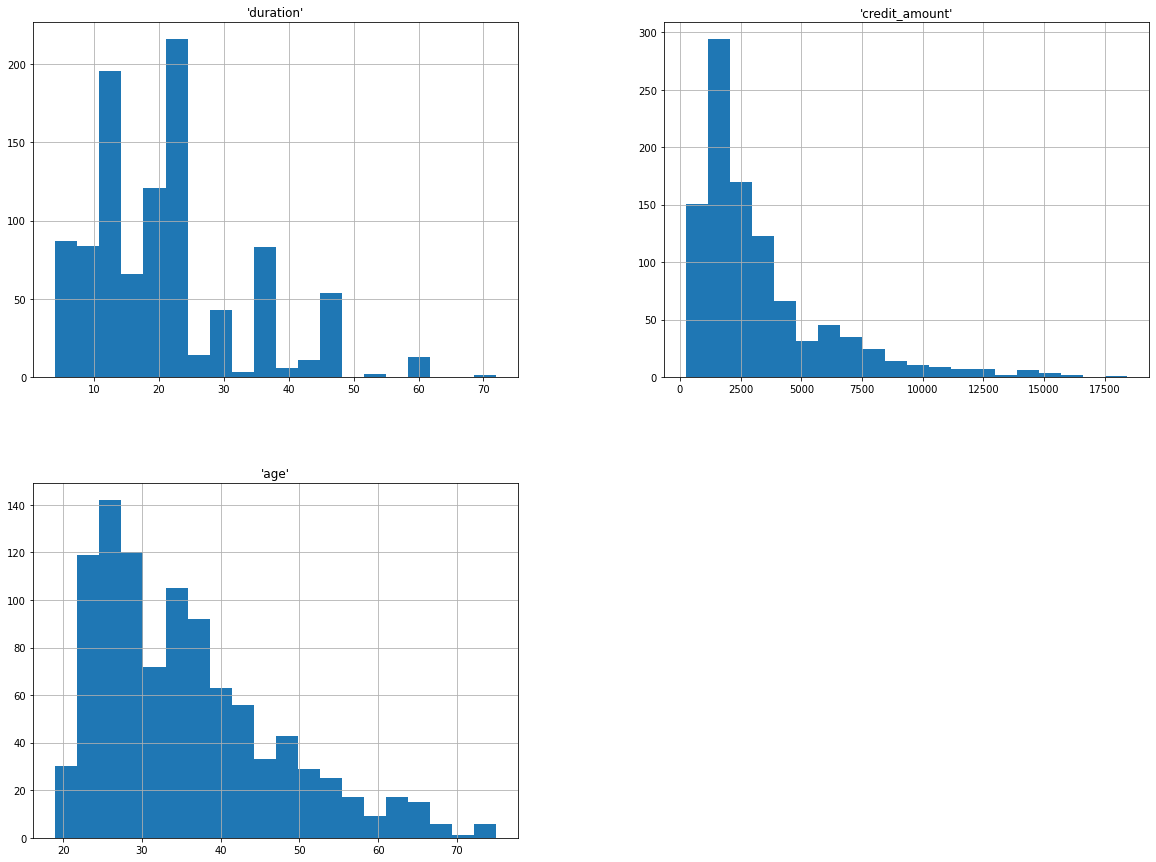

In [ ]:
# Plotting the continuous variables into a histogram to see their point distribution
%matplotlib inline
credit_data[["'duration'", "'credit_amount'", "'age'"]].hist(figsize=(20,15),bins=20)
plt.show()

'duration'


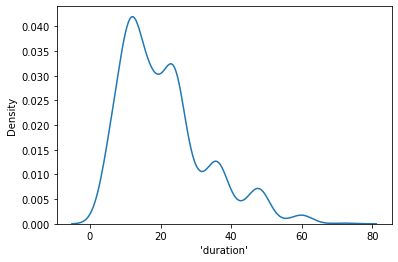

'credit_amount'


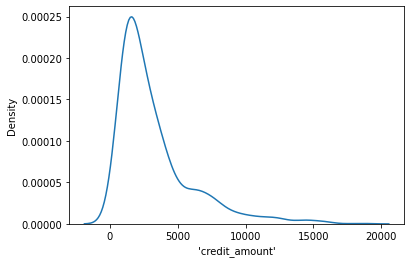

'age'


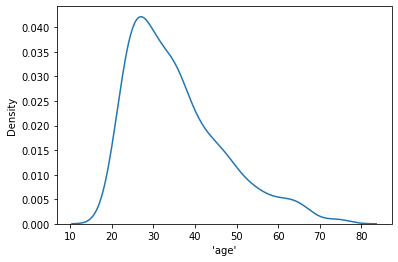

In [ ]:
# Printing out the continuous variables again to check their distribution
for i in continuous:
    print(i)
    sns.kdeplot(credit_data[i])
    plt.show()

In [ ]:
# Split the data in training and testing set. Preprocess the data (such as treatment 
# of categorical variables) and evaluate and initial Logistic Regression model (directly 
# use the provided function) with with a training/validation split.

# Importing the sklearn logistic regression packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Dropping the class because it is the target variable
data_features = credit_data.drop("'class'", axis=1)

# Setting up the training and testing data against the class variable
X_train, X_test, y_train, y_test = train_test_split(
    data_features, credit_data["'class'"], random_state=0)

In [ ]:
# Use ColumnTransformer to encode categorical variables. Evaluate Logistic Regression, 
# Linear Support Vector Machines and nearest neighbors (You can directly call these functions).

# Importing the sklearn packages
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Setting up a the pipeline with a median strategy with a StandardScaler()
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

# Defining which categorical features are numbers and just categorical
num_attr = ["'installment_commitment'", "'residence_since'", "'existing_credits'", "'num_dependents'"]
cat_attr = ["'checking_status'", "'credit_history'", "'purpose'", "'savings_status'", 
               "'employment'", "'personal_status'", "'other_parties'", "'property_magnitude'", "'other_payment_plans'", 
               "'housing'", "'job'", "'own_telephone'", "'foreign_worker'"]

# Setting up the ColumnTransformer to transform the categorical variables
pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attr),
        ("cat_pipeline", OneHotEncoder(), cat_attr),
    ])

# Fitting the pipeline to the training data
credit_prep = pipeline.fit_transform(X_train)

In [ ]:
# Checking the shape of the pipeline
credit_prep.shape

(750, 71)

In [ ]:
# Using the logistic regression function to fit it on the pipeline and the training data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(credit_prep, y_train)

# Printing the lofistic regression of the test data
X_test_trans = pipeline.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.74


In [ ]:
# Linear Support Vector Machines 
# From https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm

# Setting up the svm for the pipeline and the training data
credit_svm = svm.SVC()
credit_svm.fit(credit_prep, y_train)

# Printint the svm preddiction on the pipeline
credit_svm.predict(credit_prep)

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 

In [ ]:
# Nearest neighbors
# Found from https://scikit-learn.org/stable/modules/neighbors.html
from sklearn.neighbors import NearestNeighbors

# Creating a nearest neighbors variable which is fit to the pipeline
credit_nearest_neighbors = NearestNeighbors().fit(credit_prep)
credit_neigbor_distance, credit_neighbor_location = credit_nearest_neighbors.kneighbors(credit_prep)

# Looping over the distances in the nearest neighbors that are found and printing them
for neighbor_distance in credit_neigbor_distance:
  print(neighbor_distance)

[0.         2.98008759 3.0150182  3.18620545 3.23553725]
[0.         3.66860846 3.68893416 3.78545214 3.90171677]
[0.         2.83472476 3.02990659 3.20397329 3.20632119]
[0.         2.2148634  2.51116905 2.63711094 2.84723318]
[0.         2.85703314 2.94772813 3.04769045 3.05461653]
[0.         1.84435653 2.27258271 2.29540448 2.56655232]
[0.         2.89050397 3.0739379  3.11604481 3.16697382]
[0.         3.38164767 3.89879261 3.9875506  3.99983219]
[0.         2.15544378 2.46412255 2.48091839 2.51189242]
[0.         2.08032034 2.51837944 2.82682214 2.83687291]
[0.         2.87774125 2.925472   3.12787966 3.1880643 ]
[0.         3.24090887 3.2996448  3.31257479 3.35700544]
[0.         2.87348937 3.17628386 3.24700355 3.29617002]
[0.         3.18333003 3.25324998 3.25870465 3.46541112]
[0.         4.12107595 4.12648433 4.32290442 4.46598973]
[0.         3.21462666 3.45329104 3.50734599 3.56970434]
[0.         3.18402965 3.20961121 3.23307252 3.27973152]
[0.         2.50306997 2.520826